# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import catboost as cb
from catboost import Pool,cv,CatBoostClassifier
from xgboost import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import *
from catboost import *

# Loading Dataset

In [2]:
df=pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Exploratory Data Analysis (EDA)

In [4]:
df.shape

(520, 17)

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# Data Visualisation

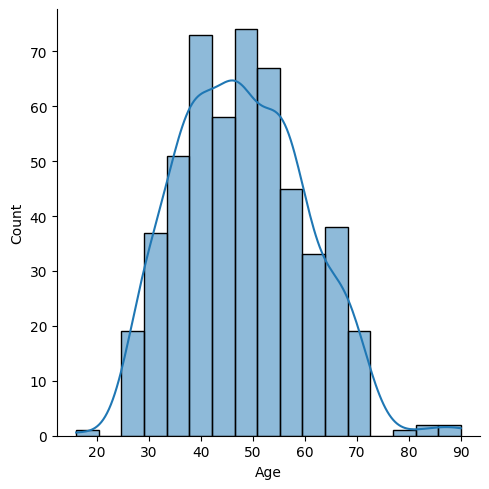

In [8]:
sns.displot(x='Age',data=df,kde=True)

Gender
Female    192
Male      328
dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

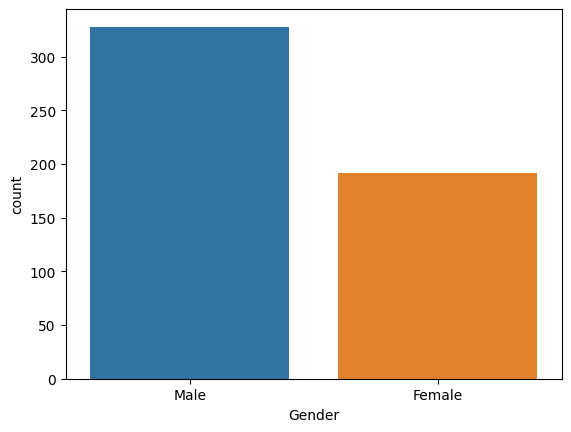

In [9]:
print(df.groupby('Gender').size())
sns.countplot(x='Gender',data=df,label='count')

Number of patients diagnosed with Diabetes:  320
Number of patients not diagnosed with Diabetes:  200


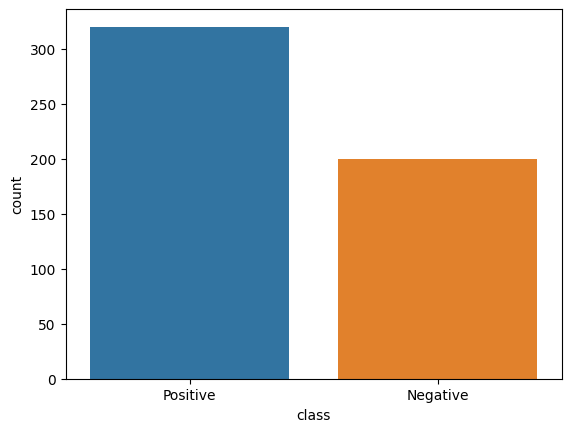

In [10]:
sns.countplot(data=df,x='class',label='count')
PD, NPD = df['class'].value_counts()
print('Number of patients diagnosed with Diabetes: ',PD)
print('Number of patients not diagnosed with Diabetes: ',NPD)

<AxesSubplot:xlabel='class', ylabel='count'>

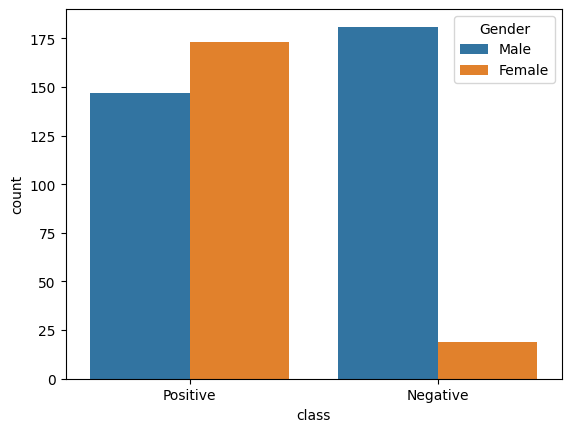

In [11]:
sns.countplot(data=df,x='class',hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Gender'>

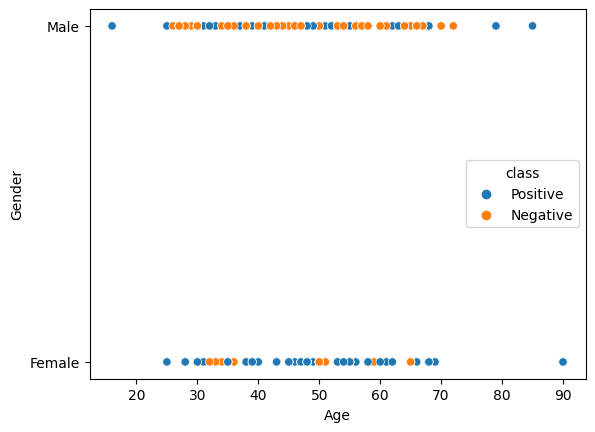

In [12]:
sns.scatterplot(x="Age", y="Gender", hue="class", data=df)

In [13]:
df[['Gender', 'class','Age']].groupby(['class','Gender'], as_index=False).mean().sort_values(by='class')

,class,Gender,Age
0,Negative,Female,46.315789
1,Negative,Male,46.364641
2,Positive,Female,47.109827
3,Positive,Male,51.380952


<AxesSubplot:xlabel='class', ylabel='count'>

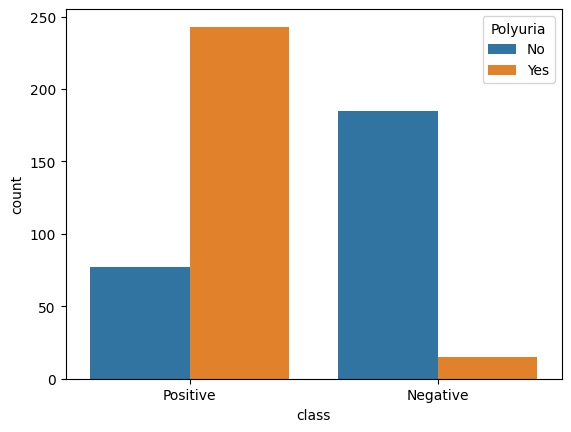

In [14]:
sns.countplot(data=df,x='class',hue='Polyuria')

# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [16]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [18]:
features=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']
for i in features:
    df[i]=le.fit_transform(df[i])

In [19]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


No=0,Yes=1
Male=1,Female=0


# Feature Correlation using Heatmap

Text(0.5, 1.0, 'Correlation between all features')

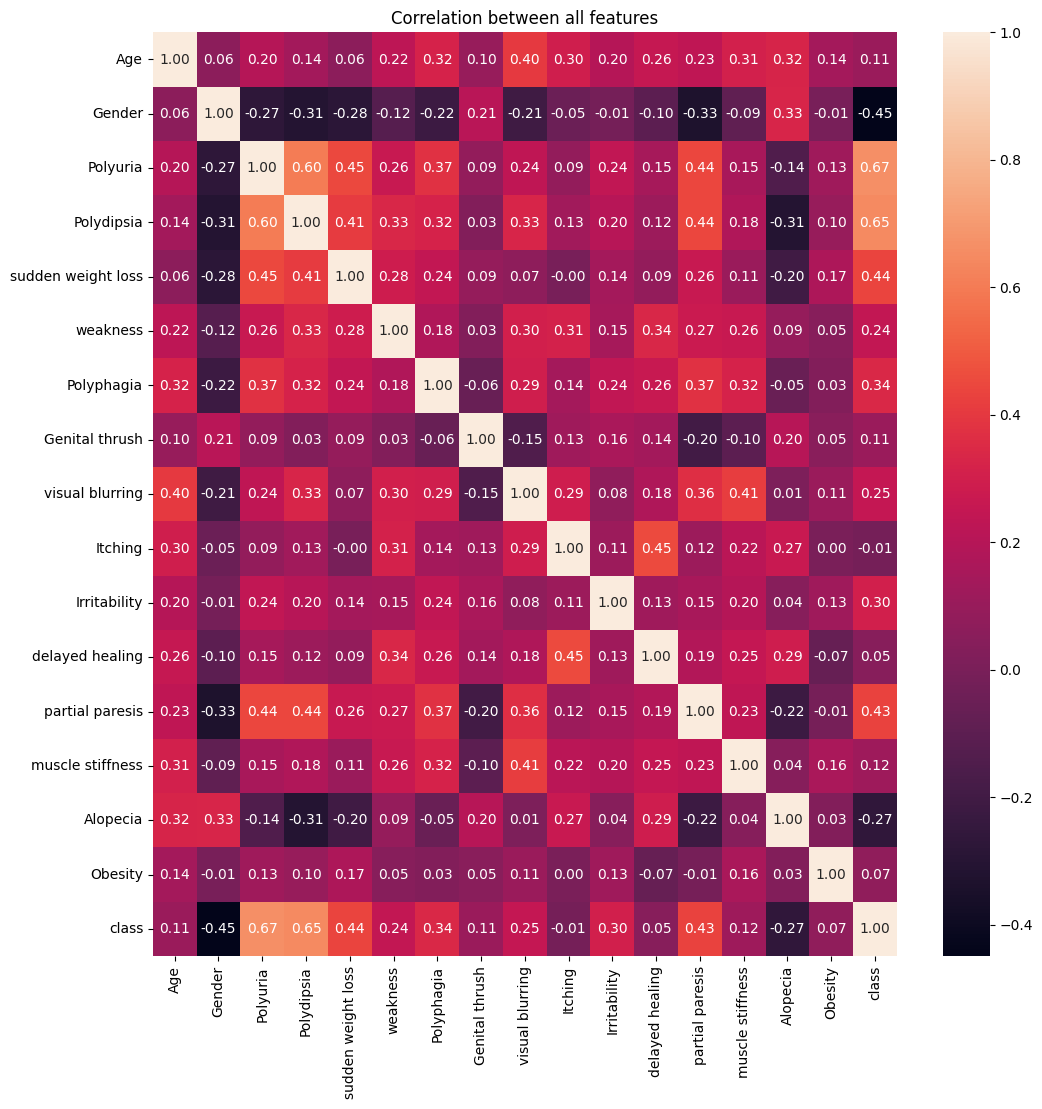

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title('Correlation between all features')

In [21]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Data Splitting

In [22]:
x=df.drop(['class'],axis=1)

In [23]:
y=df['class']

In [24]:
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32

# Train-Test Splitting

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((416, 16), (104, 16), (416,), (104,))

# Feature Importance

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [31]:
col=['Age','Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
feature_imp=pd.Series(model.feature_importances_,index=col)
feature_imp.sort_values(ascending=False)

Polyuria              0.254186
Polydipsia            0.174450
Gender                0.086554
sudden weight loss    0.065304
partial paresis       0.063075
Age                   0.048913
Irritability          0.045549
Polyphagia            0.037860
visual blurring       0.034984
Alopecia              0.034439
delayed healing       0.032991
Itching               0.029710
muscle stiffness      0.024028
Genital thrush        0.023604
weakness              0.023427
Obesity               0.020928
dtype: float64

<AxesSubplot:>

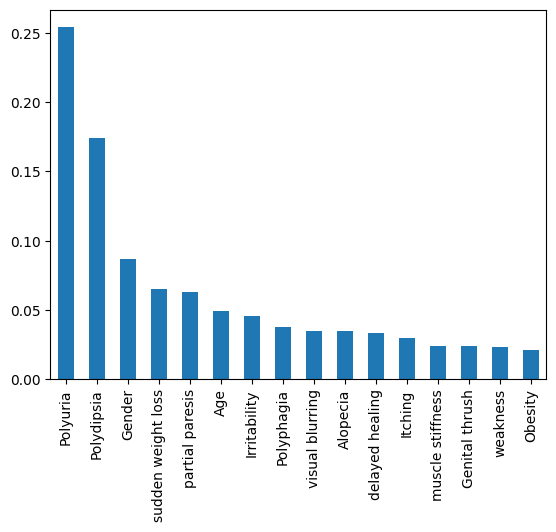

In [32]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

### Polyuria and Polydipsia are most important symptoms of diabete

# Catboost Model Training

In [33]:
train_data=cb.Pool(xtrain,ytrain)
model1=cb.CatBoostClassifier()
grid={
    'iterations':[100,110],
    'learning_rate':[0.03,0.1],
    'depth':[2,4,6,8],
    'max_bin':[150,300],
}
model1.grid_search(grid,train_data)


0:	learn: 0.6555531	test: 0.6550695	best: 0.6550695 (0)	total: 141ms	remaining: 14s
1:	learn: 0.6218047	test: 0.6208337	best: 0.6208337 (1)	total: 143ms	remaining: 6.99s
2:	learn: 0.6028444	test: 0.5999680	best: 0.5999680 (2)	total: 144ms	remaining: 4.67s
3:	learn: 0.5794220	test: 0.5784762	best: 0.5784762 (3)	total: 146ms	remaining: 3.5s
4:	learn: 0.5581330	test: 0.5589990	best: 0.5589990 (4)	total: 147ms	remaining: 2.8s
5:	learn: 0.5388363	test: 0.5413552	best: 0.5413552 (5)	total: 149ms	remaining: 2.33s
6:	learn: 0.5194817	test: 0.5219420	best: 0.5219420 (6)	total: 150ms	remaining: 2s
7:	learn: 0.4987863	test: 0.5004619	best: 0.5004619 (7)	total: 152ms	remaining: 1.75s
8:	learn: 0.4872174	test: 0.4871248	best: 0.4871248 (8)	total: 153ms	remaining: 1.55s
9:	learn: 0.4755477	test: 0.4746240	best: 0.4746240 (9)	total: 155ms	remaining: 1.39s
10:	learn: 0.4637484	test: 0.4612102	best: 0.4612102 (10)	total: 157ms	remaining: 1.27s
11:	learn: 0.4532017	test: 0.4516882	best: 0.4516882 (11)	t

24:	learn: 0.2286674	test: 0.2349729	best: 0.2349729 (24)	total: 33.7ms	remaining: 101ms
25:	learn: 0.2259957	test: 0.2331050	best: 0.2331050 (25)	total: 36ms	remaining: 102ms
26:	learn: 0.2233948	test: 0.2313101	best: 0.2313101 (26)	total: 37.4ms	remaining: 101ms
27:	learn: 0.2201735	test: 0.2285787	best: 0.2285787 (27)	total: 38.6ms	remaining: 99.3ms
28:	learn: 0.2145238	test: 0.2267418	best: 0.2267418 (28)	total: 39.9ms	remaining: 97.7ms
29:	learn: 0.2107404	test: 0.2222017	best: 0.2222017 (29)	total: 41.2ms	remaining: 96ms
30:	learn: 0.2077922	test: 0.2192004	best: 0.2192004 (30)	total: 42.4ms	remaining: 94.3ms
31:	learn: 0.2050647	test: 0.2172077	best: 0.2172077 (31)	total: 43.6ms	remaining: 92.8ms
32:	learn: 0.2028783	test: 0.2157385	best: 0.2157385 (32)	total: 44.9ms	remaining: 91.2ms
33:	learn: 0.2015837	test: 0.2135022	best: 0.2135022 (33)	total: 46.7ms	remaining: 90.7ms
34:	learn: 0.2005222	test: 0.2143078	best: 0.2135022 (33)	total: 48.3ms	remaining: 89.6ms
35:	learn: 0.1979

63:	learn: 0.2544823	test: 0.2575607	best: 0.2575607 (63)	total: 82.5ms	remaining: 59.3ms
64:	learn: 0.2521270	test: 0.2564984	best: 0.2564984 (64)	total: 84.7ms	remaining: 58.6ms
65:	learn: 0.2509545	test: 0.2548740	best: 0.2548740 (65)	total: 86.1ms	remaining: 57.4ms
66:	learn: 0.2499350	test: 0.2537195	best: 0.2537195 (66)	total: 87.6ms	remaining: 56.2ms
67:	learn: 0.2469482	test: 0.2506231	best: 0.2506231 (67)	total: 89ms	remaining: 55ms
68:	learn: 0.2457890	test: 0.2497632	best: 0.2497632 (68)	total: 90.3ms	remaining: 53.6ms
69:	learn: 0.2441549	test: 0.2485565	best: 0.2485565 (69)	total: 91.7ms	remaining: 52.4ms
70:	learn: 0.2435623	test: 0.2484805	best: 0.2484805 (70)	total: 93ms	remaining: 51.1ms
71:	learn: 0.2426930	test: 0.2472906	best: 0.2472906 (71)	total: 94.2ms	remaining: 49.7ms
72:	learn: 0.2419068	test: 0.2466987	best: 0.2466987 (72)	total: 95.4ms	remaining: 48.4ms
73:	learn: 0.2404750	test: 0.2449387	best: 0.2449387 (73)	total: 96.9ms	remaining: 47.1ms
74:	learn: 0.238

95:	learn: 0.1166364	test: 0.1644266	best: 0.1620212 (92)	total: 128ms	remaining: 18.6ms
96:	learn: 0.1156959	test: 0.1631692	best: 0.1620212 (92)	total: 130ms	remaining: 17.4ms
97:	learn: 0.1149086	test: 0.1636726	best: 0.1620212 (92)	total: 131ms	remaining: 16.1ms
98:	learn: 0.1140266	test: 0.1611517	best: 0.1611517 (98)	total: 133ms	remaining: 14.8ms
99:	learn: 0.1133675	test: 0.1602202	best: 0.1602202 (99)	total: 134ms	remaining: 13.4ms
100:	learn: 0.1130530	test: 0.1600287	best: 0.1600287 (100)	total: 136ms	remaining: 12.1ms
101:	learn: 0.1123126	test: 0.1577883	best: 0.1577883 (101)	total: 137ms	remaining: 10.7ms
102:	learn: 0.1109674	test: 0.1547273	best: 0.1547273 (102)	total: 138ms	remaining: 9.38ms
103:	learn: 0.1100015	test: 0.1541861	best: 0.1541861 (103)	total: 139ms	remaining: 8.04ms
104:	learn: 0.1091347	test: 0.1556865	best: 0.1541861 (103)	total: 141ms	remaining: 6.69ms
105:	learn: 0.1087997	test: 0.1570545	best: 0.1541861 (103)	total: 142ms	remaining: 5.37ms
106:	lear

4:	learn: 0.3329190	test: 0.3448281	best: 0.3448281 (4)	total: 9.16ms	remaining: 174ms
5:	learn: 0.3040124	test: 0.3180157	best: 0.3180157 (5)	total: 11.2ms	remaining: 176ms
6:	learn: 0.2829096	test: 0.2951143	best: 0.2951143 (6)	total: 13.2ms	remaining: 176ms
7:	learn: 0.2611642	test: 0.2751304	best: 0.2751304 (7)	total: 15.6ms	remaining: 179ms
8:	learn: 0.2465608	test: 0.2631161	best: 0.2631161 (8)	total: 17.4ms	remaining: 176ms
9:	learn: 0.2327711	test: 0.2477365	best: 0.2477365 (9)	total: 18.9ms	remaining: 170ms
10:	learn: 0.2221410	test: 0.2343189	best: 0.2343189 (10)	total: 20.4ms	remaining: 165ms
11:	learn: 0.2089826	test: 0.2173923	best: 0.2173923 (11)	total: 22.1ms	remaining: 162ms
12:	learn: 0.1989941	test: 0.2113328	best: 0.2113328 (12)	total: 23.6ms	remaining: 158ms
13:	learn: 0.1895073	test: 0.1986560	best: 0.1986560 (13)	total: 25.1ms	remaining: 154ms
14:	learn: 0.1820682	test: 0.1949070	best: 0.1949070 (14)	total: 26.6ms	remaining: 151ms
15:	learn: 0.1735074	test: 0.1907

25:	learn: 0.2793596	test: 0.2830775	best: 0.2830775 (25)	total: 43.7ms	remaining: 141ms
26:	learn: 0.2740658	test: 0.2771756	best: 0.2771756 (26)	total: 45.8ms	remaining: 141ms
27:	learn: 0.2692837	test: 0.2729780	best: 0.2729780 (27)	total: 47.5ms	remaining: 139ms
28:	learn: 0.2635857	test: 0.2680977	best: 0.2680977 (28)	total: 49.6ms	remaining: 138ms
29:	learn: 0.2583355	test: 0.2649075	best: 0.2649075 (29)	total: 51.2ms	remaining: 137ms
30:	learn: 0.2535561	test: 0.2608167	best: 0.2608167 (30)	total: 52.7ms	remaining: 134ms
31:	learn: 0.2480164	test: 0.2573141	best: 0.2573141 (31)	total: 54.3ms	remaining: 132ms
32:	learn: 0.2429609	test: 0.2520233	best: 0.2520233 (32)	total: 55.8ms	remaining: 130ms
33:	learn: 0.2381605	test: 0.2460656	best: 0.2460656 (33)	total: 57.4ms	remaining: 128ms
34:	learn: 0.2342661	test: 0.2429500	best: 0.2429500 (34)	total: 59ms	remaining: 127ms
35:	learn: 0.2303526	test: 0.2392850	best: 0.2392850 (35)	total: 60.8ms	remaining: 125ms
36:	learn: 0.2268290	te

37:	learn: 0.0824437	test: 0.1231437	best: 0.1231437 (37)	total: 62.5ms	remaining: 118ms
38:	learn: 0.0814945	test: 0.1220902	best: 0.1220902 (38)	total: 64.7ms	remaining: 118ms
39:	learn: 0.0796019	test: 0.1216766	best: 0.1216766 (39)	total: 66.8ms	remaining: 117ms
40:	learn: 0.0786447	test: 0.1203217	best: 0.1203217 (40)	total: 68.5ms	remaining: 115ms
41:	learn: 0.0760922	test: 0.1178599	best: 0.1178599 (41)	total: 70ms	remaining: 113ms
42:	learn: 0.0752344	test: 0.1165640	best: 0.1165640 (42)	total: 71.6ms	remaining: 112ms
43:	learn: 0.0737071	test: 0.1155367	best: 0.1155367 (43)	total: 73.2ms	remaining: 110ms
44:	learn: 0.0720914	test: 0.1141656	best: 0.1141656 (44)	total: 74.8ms	remaining: 108ms
45:	learn: 0.0706502	test: 0.1126194	best: 0.1126194 (45)	total: 76.3ms	remaining: 106ms
46:	learn: 0.0691963	test: 0.1120125	best: 0.1120125 (46)	total: 78ms	remaining: 105ms
47:	learn: 0.0673518	test: 0.1121196	best: 0.1120125 (46)	total: 79.8ms	remaining: 103ms
48:	learn: 0.0652687	test

33:	learn: 0.2000953	test: 0.2320287	best: 0.2320287 (33)	total: 85.7ms	remaining: 166ms
34:	learn: 0.1950376	test: 0.2256799	best: 0.2256799 (34)	total: 88.6ms	remaining: 164ms
35:	learn: 0.1901637	test: 0.2202540	best: 0.2202540 (35)	total: 91.2ms	remaining: 162ms
36:	learn: 0.1854018	test: 0.2146927	best: 0.2146927 (36)	total: 93.6ms	remaining: 159ms
37:	learn: 0.1809288	test: 0.2114628	best: 0.2114628 (37)	total: 95.9ms	remaining: 156ms
38:	learn: 0.1770005	test: 0.2074692	best: 0.2074692 (38)	total: 98.3ms	remaining: 154ms
39:	learn: 0.1732232	test: 0.2042411	best: 0.2042411 (39)	total: 101ms	remaining: 151ms
40:	learn: 0.1691867	test: 0.2011495	best: 0.2011495 (40)	total: 103ms	remaining: 149ms
41:	learn: 0.1650288	test: 0.1978873	best: 0.1978873 (41)	total: 106ms	remaining: 146ms
42:	learn: 0.1617908	test: 0.1951181	best: 0.1951181 (42)	total: 108ms	remaining: 144ms
43:	learn: 0.1591188	test: 0.1935946	best: 0.1935946 (43)	total: 111ms	remaining: 141ms
44:	learn: 0.1556830	test:

68:	learn: 0.0246111	test: 0.0706019	best: 0.0706019 (68)	total: 216ms	remaining: 97.2ms
69:	learn: 0.0241080	test: 0.0698985	best: 0.0698985 (69)	total: 219ms	remaining: 94ms
70:	learn: 0.0235626	test: 0.0687261	best: 0.0687261 (70)	total: 222ms	remaining: 90.6ms
71:	learn: 0.0232074	test: 0.0686335	best: 0.0686335 (71)	total: 224ms	remaining: 87.2ms
72:	learn: 0.0228383	test: 0.0679768	best: 0.0679768 (72)	total: 227ms	remaining: 83.8ms
73:	learn: 0.0224131	test: 0.0676758	best: 0.0676758 (73)	total: 229ms	remaining: 80.5ms
74:	learn: 0.0218185	test: 0.0660911	best: 0.0660911 (74)	total: 232ms	remaining: 77.2ms
75:	learn: 0.0213976	test: 0.0663246	best: 0.0660911 (74)	total: 235ms	remaining: 74.2ms
76:	learn: 0.0208058	test: 0.0648088	best: 0.0648088 (76)	total: 239ms	remaining: 71.3ms
77:	learn: 0.0203051	test: 0.0650298	best: 0.0648088 (76)	total: 241ms	remaining: 68ms
78:	learn: 0.0200268	test: 0.0647027	best: 0.0647027 (78)	total: 244ms	remaining: 64.8ms
79:	learn: 0.0196994	test

14:	learn: 0.1480646	test: 0.1732618	best: 0.1732618 (14)	total: 38.5ms	remaining: 244ms
15:	learn: 0.1386631	test: 0.1691709	best: 0.1691709 (15)	total: 41.1ms	remaining: 241ms
16:	learn: 0.1321052	test: 0.1641305	best: 0.1641305 (16)	total: 43.8ms	remaining: 239ms
17:	learn: 0.1241035	test: 0.1609837	best: 0.1609837 (17)	total: 46.2ms	remaining: 236ms
18:	learn: 0.1181708	test: 0.1573670	best: 0.1573670 (18)	total: 48.6ms	remaining: 233ms
19:	learn: 0.1118775	test: 0.1523687	best: 0.1523687 (19)	total: 51.1ms	remaining: 230ms
20:	learn: 0.1080757	test: 0.1502531	best: 0.1502531 (20)	total: 53.4ms	remaining: 226ms
21:	learn: 0.1062576	test: 0.1487466	best: 0.1487466 (21)	total: 54.7ms	remaining: 219ms
22:	learn: 0.1006037	test: 0.1434200	best: 0.1434200 (22)	total: 57.4ms	remaining: 217ms
23:	learn: 0.0968858	test: 0.1388857	best: 0.1388857 (23)	total: 59.6ms	remaining: 214ms
24:	learn: 0.0934949	test: 0.1384589	best: 0.1384589 (24)	total: 61.9ms	remaining: 210ms
25:	learn: 0.0899027	

42:	learn: 0.1539891	test: 0.1860990	best: 0.1860990 (42)	total: 174ms	remaining: 230ms
43:	learn: 0.1501735	test: 0.1827702	best: 0.1827702 (43)	total: 179ms	remaining: 227ms
44:	learn: 0.1466175	test: 0.1795546	best: 0.1795546 (44)	total: 183ms	remaining: 224ms
45:	learn: 0.1432682	test: 0.1771888	best: 0.1771888 (45)	total: 187ms	remaining: 220ms
46:	learn: 0.1401730	test: 0.1733933	best: 0.1733933 (46)	total: 192ms	remaining: 216ms
47:	learn: 0.1373359	test: 0.1704809	best: 0.1704809 (47)	total: 197ms	remaining: 213ms
48:	learn: 0.1346707	test: 0.1686891	best: 0.1686891 (48)	total: 201ms	remaining: 210ms
49:	learn: 0.1319268	test: 0.1666887	best: 0.1666887 (49)	total: 206ms	remaining: 206ms
50:	learn: 0.1294018	test: 0.1641872	best: 0.1641872 (50)	total: 210ms	remaining: 202ms
51:	learn: 0.1263735	test: 0.1613404	best: 0.1613404 (51)	total: 215ms	remaining: 198ms
52:	learn: 0.1243602	test: 0.1599729	best: 0.1599729 (52)	total: 219ms	remaining: 195ms
53:	learn: 0.1220234	test: 0.158

35:	learn: 0.0454554	test: 0.0880648	best: 0.0880648 (35)	total: 168ms	remaining: 299ms
36:	learn: 0.0431913	test: 0.0841817	best: 0.0841817 (36)	total: 173ms	remaining: 295ms
37:	learn: 0.0421574	test: 0.0827828	best: 0.0827828 (37)	total: 178ms	remaining: 290ms
38:	learn: 0.0409475	test: 0.0821047	best: 0.0821047 (38)	total: 182ms	remaining: 285ms
39:	learn: 0.0397896	test: 0.0821822	best: 0.0821047 (38)	total: 187ms	remaining: 281ms
40:	learn: 0.0385126	test: 0.0810126	best: 0.0810126 (40)	total: 192ms	remaining: 276ms
41:	learn: 0.0370394	test: 0.0784873	best: 0.0784873 (41)	total: 197ms	remaining: 272ms
42:	learn: 0.0361950	test: 0.0778648	best: 0.0778648 (42)	total: 202ms	remaining: 267ms
43:	learn: 0.0352895	test: 0.0774303	best: 0.0774303 (43)	total: 206ms	remaining: 262ms
44:	learn: 0.0344045	test: 0.0760567	best: 0.0760567 (44)	total: 211ms	remaining: 258ms
45:	learn: 0.0333595	test: 0.0743974	best: 0.0743974 (45)	total: 215ms	remaining: 252ms
46:	learn: 0.0327053	test: 0.073

63:	learn: 0.1042063	test: 0.1428456	best: 0.1428456 (63)	total: 291ms	remaining: 209ms
64:	learn: 0.1023964	test: 0.1414784	best: 0.1414784 (64)	total: 295ms	remaining: 205ms
65:	learn: 0.1008877	test: 0.1403286	best: 0.1403286 (65)	total: 300ms	remaining: 200ms
66:	learn: 0.0992168	test: 0.1384303	best: 0.1384303 (66)	total: 304ms	remaining: 195ms
67:	learn: 0.0978847	test: 0.1373086	best: 0.1373086 (67)	total: 307ms	remaining: 190ms
68:	learn: 0.0965459	test: 0.1365355	best: 0.1365355 (68)	total: 311ms	remaining: 185ms
69:	learn: 0.0951973	test: 0.1356471	best: 0.1356471 (69)	total: 315ms	remaining: 180ms
70:	learn: 0.0939007	test: 0.1348805	best: 0.1348805 (70)	total: 320ms	remaining: 176ms
71:	learn: 0.0921711	test: 0.1337005	best: 0.1337005 (71)	total: 325ms	remaining: 172ms
72:	learn: 0.0909981	test: 0.1324577	best: 0.1324577 (72)	total: 330ms	remaining: 167ms
73:	learn: 0.0890177	test: 0.1307251	best: 0.1307251 (73)	total: 334ms	remaining: 162ms
74:	learn: 0.0872462	test: 0.128

83:	learn: 0.0150999	test: 0.0527944	best: 0.0527944 (83)	total: 412ms	remaining: 128ms
84:	learn: 0.0147647	test: 0.0526663	best: 0.0526663 (84)	total: 417ms	remaining: 123ms
85:	learn: 0.0145942	test: 0.0527636	best: 0.0526663 (84)	total: 422ms	remaining: 118ms
86:	learn: 0.0144259	test: 0.0524580	best: 0.0524580 (86)	total: 426ms	remaining: 113ms
87:	learn: 0.0142635	test: 0.0522599	best: 0.0522599 (87)	total: 431ms	remaining: 108ms
88:	learn: 0.0141086	test: 0.0523589	best: 0.0522599 (87)	total: 435ms	remaining: 103ms
89:	learn: 0.0139501	test: 0.0522587	best: 0.0522587 (89)	total: 440ms	remaining: 97.8ms
90:	learn: 0.0137811	test: 0.0521559	best: 0.0521559 (90)	total: 445ms	remaining: 93ms
91:	learn: 0.0136344	test: 0.0518793	best: 0.0518793 (91)	total: 450ms	remaining: 88ms
92:	learn: 0.0133533	test: 0.0517822	best: 0.0517822 (92)	total: 454ms	remaining: 83ms
93:	learn: 0.0132003	test: 0.0516960	best: 0.0516960 (93)	total: 460ms	remaining: 78.3ms
94:	learn: 0.0130671	test: 0.0514

52:	learn: 0.1659718	test: 0.1884175	best: 0.1884175 (52)	total: 86.2ms	remaining: 76.5ms
53:	learn: 0.1636426	test: 0.1900895	best: 0.1884175 (52)	total: 87.7ms	remaining: 74.7ms
54:	learn: 0.1628418	test: 0.1917887	best: 0.1884175 (52)	total: 89ms	remaining: 72.8ms
55:	learn: 0.1613789	test: 0.1915519	best: 0.1884175 (52)	total: 90.3ms	remaining: 70.9ms
56:	learn: 0.1589922	test: 0.1926602	best: 0.1884175 (52)	total: 91.5ms	remaining: 69ms
57:	learn: 0.1572024	test: 0.1908431	best: 0.1884175 (52)	total: 93ms	remaining: 67.4ms
58:	learn: 0.1557525	test: 0.1885384	best: 0.1884175 (52)	total: 94.4ms	remaining: 65.6ms
59:	learn: 0.1549941	test: 0.1883266	best: 0.1883266 (59)	total: 95.8ms	remaining: 63.9ms
60:	learn: 0.1539966	test: 0.1876448	best: 0.1876448 (60)	total: 97.1ms	remaining: 62.1ms
61:	learn: 0.1527038	test: 0.1867765	best: 0.1867765 (61)	total: 98.3ms	remaining: 60.3ms
62:	learn: 0.1501508	test: 0.1839364	best: 0.1839364 (62)	total: 99.6ms	remaining: 58.5ms
63:	learn: 0.149

82:	learn: 0.2298816	test: 0.2362830	best: 0.2362830 (82)	total: 128ms	remaining: 41.8ms
83:	learn: 0.2285340	test: 0.2348929	best: 0.2348929 (83)	total: 130ms	remaining: 40.4ms
84:	learn: 0.2273363	test: 0.2336311	best: 0.2336311 (84)	total: 132ms	remaining: 38.8ms
85:	learn: 0.2265784	test: 0.2326505	best: 0.2326505 (85)	total: 133ms	remaining: 37.2ms
86:	learn: 0.2261558	test: 0.2325112	best: 0.2325112 (86)	total: 134ms	remaining: 35.5ms
87:	learn: 0.2253968	test: 0.2316891	best: 0.2316891 (87)	total: 136ms	remaining: 33.9ms
88:	learn: 0.2242361	test: 0.2310154	best: 0.2310154 (88)	total: 137ms	remaining: 32.3ms
89:	learn: 0.2235145	test: 0.2305857	best: 0.2305857 (89)	total: 138ms	remaining: 30.7ms
90:	learn: 0.2226607	test: 0.2295501	best: 0.2295501 (90)	total: 140ms	remaining: 29.1ms
91:	learn: 0.2212861	test: 0.2280213	best: 0.2280213 (91)	total: 141ms	remaining: 27.6ms
92:	learn: 0.2197395	test: 0.2276044	best: 0.2276044 (92)	total: 142ms	remaining: 26ms
93:	learn: 0.2190799	te

105:	learn: 0.1087997	test: 0.1570545	best: 0.1541861 (103)	total: 157ms	remaining: 5.91ms
106:	learn: 0.1082217	test: 0.1560321	best: 0.1541861 (103)	total: 158ms	remaining: 4.43ms
107:	learn: 0.1079176	test: 0.1559941	best: 0.1541861 (103)	total: 160ms	remaining: 2.96ms
108:	learn: 0.1071613	test: 0.1549656	best: 0.1541861 (103)	total: 161ms	remaining: 1.48ms
109:	learn: 0.1068441	test: 0.1547960	best: 0.1541861 (103)	total: 162ms	remaining: 0us

bestTest = 0.1541861083
bestIteration = 103

19:	loss: 0.1541861	best: 0.0504159 (15)	total: 5.52s	remaining: 3.31s
0:	learn: 0.6555880	test: 0.6537895	best: 0.6537895 (0)	total: 1.75ms	remaining: 174ms
1:	learn: 0.6165531	test: 0.6147137	best: 0.6147137 (1)	total: 3.32ms	remaining: 163ms
2:	learn: 0.5850108	test: 0.5862814	best: 0.5862814 (2)	total: 4.91ms	remaining: 159ms
3:	learn: 0.5587189	test: 0.5612074	best: 0.5612074 (3)	total: 6.51ms	remaining: 156ms
4:	learn: 0.5404271	test: 0.5426430	best: 0.5426430 (4)	total: 8.14ms	remaining: 15

8:	learn: 0.2465608	test: 0.2631161	best: 0.2631161 (8)	total: 17ms	remaining: 172ms
9:	learn: 0.2327711	test: 0.2477365	best: 0.2477365 (9)	total: 19.1ms	remaining: 172ms
10:	learn: 0.2221410	test: 0.2343189	best: 0.2343189 (10)	total: 20.8ms	remaining: 168ms
11:	learn: 0.2089826	test: 0.2173923	best: 0.2173923 (11)	total: 22.7ms	remaining: 167ms
12:	learn: 0.1989941	test: 0.2113328	best: 0.2113328 (12)	total: 24.3ms	remaining: 163ms
13:	learn: 0.1895073	test: 0.1986560	best: 0.1986560 (13)	total: 26ms	remaining: 160ms
14:	learn: 0.1820682	test: 0.1949070	best: 0.1949070 (14)	total: 27.6ms	remaining: 157ms
15:	learn: 0.1735074	test: 0.1907129	best: 0.1907129 (15)	total: 29.3ms	remaining: 154ms
16:	learn: 0.1639850	test: 0.1836784	best: 0.1836784 (16)	total: 30.9ms	remaining: 151ms
17:	learn: 0.1566156	test: 0.1773984	best: 0.1773984 (17)	total: 32.5ms	remaining: 148ms
18:	learn: 0.1520127	test: 0.1735432	best: 0.1735432 (18)	total: 34.1ms	remaining: 145ms
19:	learn: 0.1454692	test: 0.

16:	learn: 0.3505089	test: 0.3499855	best: 0.3499855 (16)	total: 29.9ms	remaining: 163ms
17:	learn: 0.3433202	test: 0.3434949	best: 0.3434949 (17)	total: 31.6ms	remaining: 161ms
18:	learn: 0.3368013	test: 0.3356756	best: 0.3356756 (18)	total: 33.2ms	remaining: 159ms
19:	learn: 0.3274652	test: 0.3266619	best: 0.3266619 (19)	total: 34.8ms	remaining: 157ms
20:	learn: 0.3176006	test: 0.3184588	best: 0.3184588 (20)	total: 36.4ms	remaining: 154ms
21:	learn: 0.3097168	test: 0.3116413	best: 0.3116413 (21)	total: 38ms	remaining: 152ms
22:	learn: 0.3019285	test: 0.3051312	best: 0.3051312 (22)	total: 39.6ms	remaining: 150ms
23:	learn: 0.2933644	test: 0.2977946	best: 0.2977946 (23)	total: 41.2ms	remaining: 148ms
24:	learn: 0.2856594	test: 0.2883445	best: 0.2883445 (24)	total: 42.7ms	remaining: 145ms
25:	learn: 0.2793596	test: 0.2830775	best: 0.2830775 (25)	total: 44.4ms	remaining: 144ms
26:	learn: 0.2740658	test: 0.2771756	best: 0.2771756 (26)	total: 46ms	remaining: 141ms
27:	learn: 0.2692837	test

22:	learn: 0.1316431	test: 0.1640323	best: 0.1640323 (22)	total: 40.1ms	remaining: 152ms
23:	learn: 0.1281781	test: 0.1581115	best: 0.1581115 (23)	total: 42.3ms	remaining: 152ms
24:	learn: 0.1224365	test: 0.1491772	best: 0.1491772 (24)	total: 44.2ms	remaining: 150ms
25:	learn: 0.1198342	test: 0.1490116	best: 0.1490116 (25)	total: 45.9ms	remaining: 148ms
26:	learn: 0.1169470	test: 0.1461905	best: 0.1461905 (26)	total: 47.5ms	remaining: 146ms
27:	learn: 0.1119753	test: 0.1446155	best: 0.1446155 (27)	total: 49.1ms	remaining: 144ms
28:	learn: 0.1092086	test: 0.1429619	best: 0.1429619 (28)	total: 50.7ms	remaining: 142ms
29:	learn: 0.1067278	test: 0.1432899	best: 0.1429619 (28)	total: 52.4ms	remaining: 140ms
30:	learn: 0.1021326	test: 0.1388034	best: 0.1388034 (30)	total: 53.9ms	remaining: 137ms
31:	learn: 0.0992862	test: 0.1372186	best: 0.1372186 (31)	total: 55.5ms	remaining: 135ms
32:	learn: 0.0960507	test: 0.1353224	best: 0.1353224 (32)	total: 57.1ms	remaining: 133ms
33:	learn: 0.0927696	

10:	learn: 0.4088846	test: 0.4155452	best: 0.4155452 (10)	total: 32.9ms	remaining: 266ms
11:	learn: 0.3932837	test: 0.4018703	best: 0.4018703 (11)	total: 35.8ms	remaining: 262ms
12:	learn: 0.3754030	test: 0.3876352	best: 0.3876352 (12)	total: 38.6ms	remaining: 259ms
13:	learn: 0.3633067	test: 0.3741534	best: 0.3741534 (13)	total: 41.2ms	remaining: 253ms
14:	learn: 0.3517374	test: 0.3618400	best: 0.3618400 (14)	total: 43.6ms	remaining: 247ms
15:	learn: 0.3397897	test: 0.3519459	best: 0.3519459 (15)	total: 46ms	remaining: 241ms
16:	learn: 0.3273016	test: 0.3416934	best: 0.3416934 (16)	total: 48.9ms	remaining: 239ms
17:	learn: 0.3160858	test: 0.3338902	best: 0.3338902 (17)	total: 51.3ms	remaining: 234ms
18:	learn: 0.3057246	test: 0.3226869	best: 0.3226869 (18)	total: 55.6ms	remaining: 237ms
19:	learn: 0.2987263	test: 0.3161594	best: 0.3161594 (19)	total: 58.4ms	remaining: 234ms
20:	learn: 0.2894241	test: 0.3077627	best: 0.3077627 (20)	total: 61.3ms	remaining: 231ms
21:	learn: 0.2806636	te

66:	learn: 0.0256042	test: 0.0713127	best: 0.0713127 (66)	total: 161ms	remaining: 79.2ms
67:	learn: 0.0250494	test: 0.0707243	best: 0.0707243 (67)	total: 163ms	remaining: 76.9ms
68:	learn: 0.0246111	test: 0.0706019	best: 0.0706019 (68)	total: 166ms	remaining: 74.6ms
69:	learn: 0.0241080	test: 0.0698985	best: 0.0698985 (69)	total: 169ms	remaining: 72.2ms
70:	learn: 0.0235626	test: 0.0687261	best: 0.0687261 (70)	total: 171ms	remaining: 69.8ms
71:	learn: 0.0232074	test: 0.0686335	best: 0.0686335 (71)	total: 173ms	remaining: 67.4ms
72:	learn: 0.0228383	test: 0.0679768	best: 0.0679768 (72)	total: 176ms	remaining: 65.1ms
73:	learn: 0.0224131	test: 0.0676758	best: 0.0676758 (73)	total: 178ms	remaining: 62.6ms
74:	learn: 0.0218185	test: 0.0660911	best: 0.0660911 (74)	total: 181ms	remaining: 60.4ms
75:	learn: 0.0213976	test: 0.0663246	best: 0.0660911 (74)	total: 183ms	remaining: 57.9ms
76:	learn: 0.0208058	test: 0.0648088	best: 0.0648088 (76)	total: 186ms	remaining: 55.6ms
77:	learn: 0.0203051	

20:	learn: 0.1080757	test: 0.1502531	best: 0.1502531 (20)	total: 53.4ms	remaining: 226ms
21:	learn: 0.1062576	test: 0.1487466	best: 0.1487466 (21)	total: 54.9ms	remaining: 220ms
22:	learn: 0.1006037	test: 0.1434200	best: 0.1434200 (22)	total: 57.4ms	remaining: 217ms
23:	learn: 0.0968858	test: 0.1388857	best: 0.1388857 (23)	total: 59.7ms	remaining: 214ms
24:	learn: 0.0934949	test: 0.1384589	best: 0.1384589 (24)	total: 62.1ms	remaining: 211ms
25:	learn: 0.0899027	test: 0.1351524	best: 0.1351524 (25)	total: 64.3ms	remaining: 208ms
26:	learn: 0.0871465	test: 0.1335368	best: 0.1335368 (26)	total: 66.6ms	remaining: 205ms
27:	learn: 0.0835747	test: 0.1301269	best: 0.1301269 (27)	total: 68.8ms	remaining: 201ms
28:	learn: 0.0811654	test: 0.1266497	best: 0.1266497 (28)	total: 71.1ms	remaining: 199ms
29:	learn: 0.0779866	test: 0.1234375	best: 0.1234375 (29)	total: 73.4ms	remaining: 196ms
30:	learn: 0.0746753	test: 0.1199798	best: 0.1199798 (30)	total: 75.6ms	remaining: 193ms
31:	learn: 0.0717271	

45:	learn: 0.1432682	test: 0.1771888	best: 0.1771888 (45)	total: 187ms	remaining: 220ms
46:	learn: 0.1401730	test: 0.1733933	best: 0.1733933 (46)	total: 193ms	remaining: 218ms
47:	learn: 0.1373359	test: 0.1704809	best: 0.1704809 (47)	total: 198ms	remaining: 215ms
48:	learn: 0.1346707	test: 0.1686891	best: 0.1686891 (48)	total: 203ms	remaining: 212ms
49:	learn: 0.1319268	test: 0.1666887	best: 0.1666887 (49)	total: 208ms	remaining: 208ms
50:	learn: 0.1294018	test: 0.1641872	best: 0.1641872 (50)	total: 213ms	remaining: 205ms
51:	learn: 0.1263735	test: 0.1613404	best: 0.1613404 (51)	total: 218ms	remaining: 201ms
52:	learn: 0.1243602	test: 0.1599729	best: 0.1599729 (52)	total: 224ms	remaining: 198ms
53:	learn: 0.1220234	test: 0.1581959	best: 0.1581959 (53)	total: 229ms	remaining: 195ms
54:	learn: 0.1195388	test: 0.1560707	best: 0.1560707 (54)	total: 233ms	remaining: 191ms
55:	learn: 0.1169010	test: 0.1534590	best: 0.1534590 (55)	total: 238ms	remaining: 187ms
56:	learn: 0.1152284	test: 0.152

75:	learn: 0.0177180	test: 0.0552130	best: 0.0552130 (75)	total: 352ms	remaining: 111ms
76:	learn: 0.0174602	test: 0.0550403	best: 0.0550403 (76)	total: 356ms	remaining: 106ms
77:	learn: 0.0170748	test: 0.0545290	best: 0.0545290 (77)	total: 361ms	remaining: 102ms
78:	learn: 0.0166785	test: 0.0542508	best: 0.0542508 (78)	total: 366ms	remaining: 97.3ms
79:	learn: 0.0164722	test: 0.0543291	best: 0.0542508 (78)	total: 370ms	remaining: 92.5ms
80:	learn: 0.0160589	test: 0.0536054	best: 0.0536054 (80)	total: 375ms	remaining: 87.9ms
81:	learn: 0.0158665	test: 0.0536910	best: 0.0536054 (80)	total: 379ms	remaining: 83.3ms
82:	learn: 0.0155105	test: 0.0535135	best: 0.0535135 (82)	total: 385ms	remaining: 78.9ms
83:	learn: 0.0150999	test: 0.0527944	best: 0.0527944 (83)	total: 391ms	remaining: 74.5ms
84:	learn: 0.0147647	test: 0.0526663	best: 0.0526663 (84)	total: 397ms	remaining: 70ms
85:	learn: 0.0145942	test: 0.0527636	best: 0.0526663 (84)	total: 402ms	remaining: 65.5ms
86:	learn: 0.0144259	test:

109:	learn: 0.0549274	test: 0.0956296	best: 0.0956296 (109)	total: 488ms	remaining: 0us

bestTest = 0.09562959666
bestIteration = 109

30:	loss: 0.0956296	best: 0.0504159 (15)	total: 8.79s	remaining: 283ms
0:	learn: 0.5891818	test: 0.5940947	best: 0.5940947 (0)	total: 4.68ms	remaining: 510ms
1:	learn: 0.5062656	test: 0.5154302	best: 0.5154302 (1)	total: 7.44ms	remaining: 402ms
2:	learn: 0.4255110	test: 0.4345968	best: 0.4345968 (2)	total: 10.4ms	remaining: 371ms
3:	learn: 0.3662762	test: 0.3780039	best: 0.3780039 (3)	total: 14.9ms	remaining: 394ms
4:	learn: 0.3247897	test: 0.3363034	best: 0.3363034 (4)	total: 19.6ms	remaining: 412ms
5:	learn: 0.2921919	test: 0.3033394	best: 0.3033394 (5)	total: 22.8ms	remaining: 395ms
6:	learn: 0.2597420	test: 0.2788548	best: 0.2788548 (6)	total: 27.1ms	remaining: 400ms
7:	learn: 0.2308009	test: 0.2534972	best: 0.2534972 (7)	total: 31.7ms	remaining: 405ms
8:	learn: 0.2064537	test: 0.2378745	best: 0.2378745 (8)	total: 36.5ms	remaining: 409ms
9:	learn: 0

97:	learn: 0.0125462	test: 0.0512284	best: 0.0512284 (97)	total: 404ms	remaining: 49.5ms
98:	learn: 0.0122901	test: 0.0509502	best: 0.0509502 (98)	total: 408ms	remaining: 45.3ms
99:	learn: 0.0121712	test: 0.0510509	best: 0.0509502 (98)	total: 411ms	remaining: 41.1ms
100:	learn: 0.0120578	test: 0.0508238	best: 0.0508238 (100)	total: 415ms	remaining: 37ms
101:	learn: 0.0119458	test: 0.0509252	best: 0.0508238 (100)	total: 418ms	remaining: 32.8ms
102:	learn: 0.0117352	test: 0.0508929	best: 0.0508238 (100)	total: 422ms	remaining: 28.7ms
103:	learn: 0.0116285	test: 0.0509951	best: 0.0508238 (100)	total: 425ms	remaining: 24.5ms
104:	learn: 0.0115250	test: 0.0507807	best: 0.0507807 (104)	total: 429ms	remaining: 20.4ms
105:	learn: 0.0114136	test: 0.0507286	best: 0.0507286 (105)	total: 432ms	remaining: 16.3ms
106:	learn: 0.0113162	test: 0.0505226	best: 0.0505226 (106)	total: 436ms	remaining: 12.2ms
107:	learn: 0.0112215	test: 0.0504311	best: 0.0504311 (107)	total: 440ms	remaining: 8.14ms
108:	le

106:	learn: 0.0105611	test: 0.1423078	best: 0.1423078 (106)	total: 528ms	remaining: 14.8ms
107:	learn: 0.0104438	test: 0.1420930	best: 0.1420930 (107)	total: 532ms	remaining: 9.85ms
108:	learn: 0.0103485	test: 0.1421057	best: 0.1420930 (107)	total: 544ms	remaining: 5ms
109:	learn: 0.0102010	test: 0.1420377	best: 0.1420377 (109)	total: 548ms	remaining: 0us

bestTest = 0.1420377333
bestIteration = 109

Training on fold [1/3]
0:	learn: 0.5707415	test: 0.5973366	best: 0.5973366 (0)	total: 1.04ms	remaining: 113ms
1:	learn: 0.4964837	test: 0.5391006	best: 0.5391006 (1)	total: 2.85ms	remaining: 154ms
2:	learn: 0.4383585	test: 0.4987775	best: 0.4987775 (2)	total: 4.85ms	remaining: 173ms
3:	learn: 0.3804917	test: 0.4521035	best: 0.4521035 (3)	total: 8.59ms	remaining: 228ms
4:	learn: 0.3348763	test: 0.4157357	best: 0.4157357 (4)	total: 12.3ms	remaining: 258ms
5:	learn: 0.3015030	test: 0.3921095	best: 0.3921095 (5)	total: 15.3ms	remaining: 264ms
6:	learn: 0.2704015	test: 0.3680569	best: 0.3680569

18:	learn: 0.1096267	test: 0.1462937	best: 0.1462937 (18)	total: 61.7ms	remaining: 295ms
19:	learn: 0.1025186	test: 0.1407023	best: 0.1407023 (19)	total: 65.5ms	remaining: 295ms
20:	learn: 0.0975146	test: 0.1374023	best: 0.1374023 (20)	total: 68.8ms	remaining: 292ms
21:	learn: 0.0919035	test: 0.1329680	best: 0.1329680 (21)	total: 72.3ms	remaining: 289ms
22:	learn: 0.0872606	test: 0.1294045	best: 0.1294045 (22)	total: 75.4ms	remaining: 285ms
23:	learn: 0.0836123	test: 0.1269888	best: 0.1269888 (23)	total: 78.9ms	remaining: 283ms
24:	learn: 0.0795009	test: 0.1229051	best: 0.1229051 (24)	total: 82ms	remaining: 279ms
25:	learn: 0.0746338	test: 0.1186214	best: 0.1186214 (25)	total: 85.2ms	remaining: 275ms
26:	learn: 0.0715486	test: 0.1158133	best: 0.1158133 (26)	total: 87.4ms	remaining: 269ms
27:	learn: 0.0689776	test: 0.1144765	best: 0.1144765 (27)	total: 91.8ms	remaining: 269ms
28:	learn: 0.0659375	test: 0.1109789	best: 0.1109789 (28)	total: 95.1ms	remaining: 266ms
29:	learn: 0.0632212	te

{'params': {'border_count': 150,
  'depth': 8,
  'iterations': 110,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [34]:
print(model1.best_score_)

{'learn': {'Logloss': 0.08379828929901123}}


In [35]:
pred=model1.predict(xtest)
cbacc=accuracy_score(ytest,pred)*100

In [36]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 97.11538461538461 %
ERROR: 0.028846153846153848


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
score=cross_val_score(model1,X=xtrain,y=ytrain)
print(np.mean(score))

0:	learn: 0.6580220	total: 5.66ms	remaining: 617ms
1:	learn: 0.6250083	total: 11.5ms	remaining: 621ms
2:	learn: 0.5876893	total: 13.4ms	remaining: 479ms
3:	learn: 0.5642053	total: 18.1ms	remaining: 480ms
4:	learn: 0.5393513	total: 23.5ms	remaining: 494ms
5:	learn: 0.5187650	total: 28.5ms	remaining: 494ms
6:	learn: 0.5016058	total: 33.3ms	remaining: 490ms
7:	learn: 0.4766520	total: 36.7ms	remaining: 467ms
8:	learn: 0.4598355	total: 41.4ms	remaining: 464ms
9:	learn: 0.4455611	total: 45.9ms	remaining: 459ms
10:	learn: 0.4311632	total: 50.8ms	remaining: 457ms
11:	learn: 0.4166634	total: 55.5ms	remaining: 453ms
12:	learn: 0.4012753	total: 59.9ms	remaining: 447ms
13:	learn: 0.3823215	total: 61.6ms	remaining: 422ms
14:	learn: 0.3705264	total: 65.7ms	remaining: 416ms
15:	learn: 0.3585995	total: 70.7ms	remaining: 415ms
16:	learn: 0.3491075	total: 75.4ms	remaining: 413ms
17:	learn: 0.3353973	total: 77.9ms	remaining: 398ms
18:	learn: 0.3263629	total: 82.3ms	remaining: 394ms
19:	learn: 0.3169748	t

63:	learn: 0.1438587	total: 269ms	remaining: 194ms
64:	learn: 0.1421891	total: 274ms	remaining: 190ms
65:	learn: 0.1403472	total: 280ms	remaining: 186ms
66:	learn: 0.1384477	total: 284ms	remaining: 182ms
67:	learn: 0.1367184	total: 289ms	remaining: 178ms
68:	learn: 0.1349935	total: 293ms	remaining: 174ms
69:	learn: 0.1335021	total: 298ms	remaining: 170ms
70:	learn: 0.1319606	total: 302ms	remaining: 166ms
71:	learn: 0.1305068	total: 307ms	remaining: 162ms
72:	learn: 0.1289632	total: 312ms	remaining: 158ms
73:	learn: 0.1277309	total: 317ms	remaining: 154ms
74:	learn: 0.1264486	total: 322ms	remaining: 150ms
75:	learn: 0.1251551	total: 328ms	remaining: 147ms
76:	learn: 0.1236623	total: 333ms	remaining: 143ms
77:	learn: 0.1224583	total: 338ms	remaining: 139ms
78:	learn: 0.1210233	total: 343ms	remaining: 135ms
79:	learn: 0.1196383	total: 348ms	remaining: 130ms
80:	learn: 0.1183987	total: 353ms	remaining: 126ms
81:	learn: 0.1171792	total: 357ms	remaining: 122ms
82:	learn: 0.1159809	total: 362

23:	learn: 0.2967651	total: 99.3ms	remaining: 356ms
24:	learn: 0.2900124	total: 105ms	remaining: 358ms
25:	learn: 0.2799420	total: 107ms	remaining: 347ms
26:	learn: 0.2730876	total: 110ms	remaining: 337ms
27:	learn: 0.2674537	total: 115ms	remaining: 336ms
28:	learn: 0.2627680	total: 119ms	remaining: 333ms
29:	learn: 0.2576816	total: 124ms	remaining: 332ms
30:	learn: 0.2524894	total: 130ms	remaining: 332ms
31:	learn: 0.2477235	total: 135ms	remaining: 329ms
32:	learn: 0.2415193	total: 140ms	remaining: 326ms
33:	learn: 0.2368248	total: 145ms	remaining: 323ms
34:	learn: 0.2326082	total: 150ms	remaining: 320ms
35:	learn: 0.2266043	total: 150ms	remaining: 309ms
36:	learn: 0.2234020	total: 155ms	remaining: 305ms
37:	learn: 0.2192351	total: 160ms	remaining: 303ms
38:	learn: 0.2153555	total: 164ms	remaining: 299ms
39:	learn: 0.2111285	total: 169ms	remaining: 296ms
40:	learn: 0.2082016	total: 174ms	remaining: 293ms
41:	learn: 0.2052766	total: 179ms	remaining: 290ms
42:	learn: 0.2026352	total: 18

86:	learn: 0.1100229	total: 347ms	remaining: 91.6ms
87:	learn: 0.1087597	total: 351ms	remaining: 87.7ms
88:	learn: 0.1078386	total: 355ms	remaining: 83.8ms
89:	learn: 0.1067236	total: 360ms	remaining: 79.9ms
90:	learn: 0.1056451	total: 364ms	remaining: 76ms
91:	learn: 0.1045993	total: 368ms	remaining: 72ms
92:	learn: 0.1035861	total: 372ms	remaining: 68ms
93:	learn: 0.1026035	total: 376ms	remaining: 64ms
94:	learn: 0.1016506	total: 380ms	remaining: 60ms
95:	learn: 0.1007373	total: 384ms	remaining: 56ms
96:	learn: 0.0998272	total: 388ms	remaining: 52ms
97:	learn: 0.0990349	total: 392ms	remaining: 48ms
98:	learn: 0.0982603	total: 397ms	remaining: 44.1ms
99:	learn: 0.0975027	total: 401ms	remaining: 40.1ms
100:	learn: 0.0966467	total: 405ms	remaining: 36.1ms
101:	learn: 0.0958143	total: 409ms	remaining: 32.1ms
102:	learn: 0.0950931	total: 413ms	remaining: 28.1ms
103:	learn: 0.0942925	total: 418ms	remaining: 24.1ms
104:	learn: 0.0935940	total: 422ms	remaining: 20.1ms
105:	learn: 0.0929107	t

In [39]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

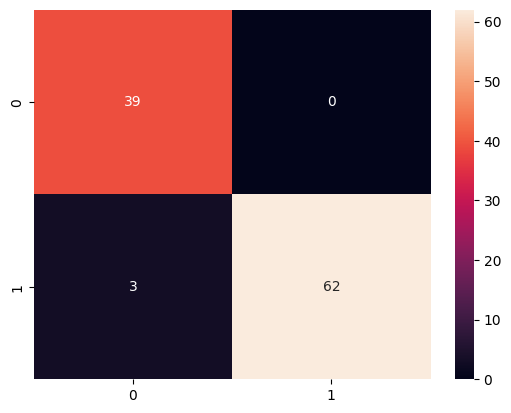

In [40]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# Random Forest

In [41]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}

rf=RandomForestClassifier()
rf_rs=RandomizedSearchCV(rf,param_distributions=parameters,cv=4,random_state=42)
rf_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [42]:
pred=rf_rs.predict(xtest)
rfacc=accuracy_score(ytest,pred)*100

In [43]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 97.11538461538461 %
ERROR: 0.028846153846153848


<AxesSubplot:>

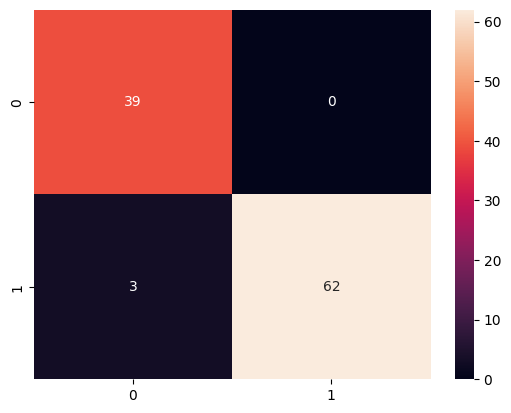

In [44]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# SVC Model

In [45]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,5]
}

svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=43)
svm_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 5],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=43)

In [46]:
pred=svm_rs.predict(xtest)
svcacc=accuracy_score(ytest,pred)*100

In [47]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 91.34615384615384 %
ERROR: 0.08653846153846154


<AxesSubplot:>

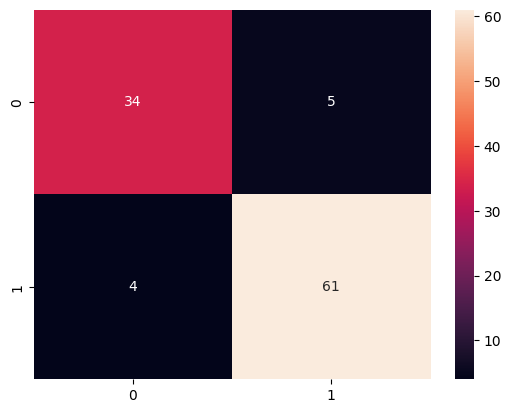

In [48]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# Logistic Regression Model

In [49]:
parameters={'max_iter':[100,200,500]}
lr=LogisticRegression()
lr_rs=RandomizedSearchCV(lr,param_distributions=parameters,cv=5,random_state=42)
lr_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=42)

In [50]:
pred=lr_rs.predict(xtest)
lracc=accuracy_score(ytest,pred)*100

In [51]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 91.34615384615384 %
ERROR: 0.08653846153846154


<AxesSubplot:>

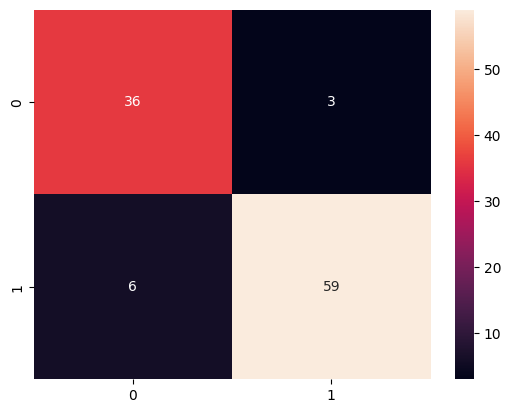

In [52]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# XGBoost Model

In [53]:
params={
    'learning_rate':0.1,
    'max_depth':8
}

model2=XGBClassifier(**params)

In [54]:
model2.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
pred=model2.predict(xtest)
xgacc=accuracy_score(ytest,pred)*100

In [56]:
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))

ACCURACY SCORE: 99.03846153846155 %
ERROR: 0.009615384615384616


<AxesSubplot:>

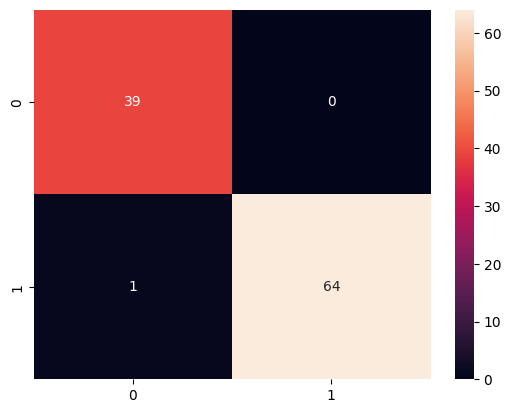

In [57]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

# Model Evaluation

In [58]:
final=pd.DataFrame({
    'Model':['Catboost','Random Forest','SVC','Logistic Regression','XGBoost'],
    'Accuracy Score':[cbacc,rfacc,svcacc,lracc,xgacc]
})
final.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score
4,XGBoost,99.038462
0,Catboost,97.115385
1,Random Forest,97.115385
2,SVC,91.346154
3,Logistic Regression,91.346154


# Conclusion

### By hyperparameter and cross validation, We got to know that XGBoost gives the best prediction result with accuracy of approx. 99% and error nearly close to 0. So we will use XGBoost model for prediction in web application.

# For streamlit webapp

In [62]:
import pickle as pkl

In [63]:
pkl.dump(df,open('data.pkl','wb'))

In [64]:
pkl.dump(model2,open('model.pkl','wb')) #we are selecting XGboost for this app as it has most accuracy